In [454]:
import sys
assert sys.version_info >= (3,5)

In [455]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [456]:
import pandas as pd

In [457]:
import numpy as np

In [458]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [459]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [460]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [461]:
from pandas.plotting import scatter_matrix

In [462]:
happiness=pd.read_csv('../Data/happiness.csv')

In [463]:
happiness.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [464]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [465]:
happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [466]:
null_rows=happiness[happiness.isnull().any(axis=1)].head()
null_rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [467]:
happiness=happiness.drop("Country", axis=1)
happiness=happiness.drop("Happiness Rank", axis=1)
happiness=happiness.drop("Standard Error", axis=1)
happiness

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [468]:
happiness["Region"].value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

In [469]:
happiness['Region'] = ordinal_encoder.fit_transform(happiness[["Region"]])

In [470]:
happiness['Region'].value_counts()

Region
8.0    40
1.0    29
3.0    22
9.0    21
4.0    20
6.0     9
7.0     7
2.0     6
5.0     2
0.0     2
Name: count, dtype: int64

In [471]:
attr = ['Family','Health (Life Expectancy)','Economy (GDP per Capita)','Freedom','Dystopia Residual','Generosity','Trust (Government Corruption)']
happiness[attr] = pd.DataFrame(scaler.fit_transform(happiness[attr].values), columns=attr)

In [472]:
happiness["Happiness Score"] = pd.cut(happiness["Happiness Score"],
                                      bins=[2.500000,5.000000,7.500000,10.000000],
                                      labels=["Low","Medium","High"])

<Axes: >

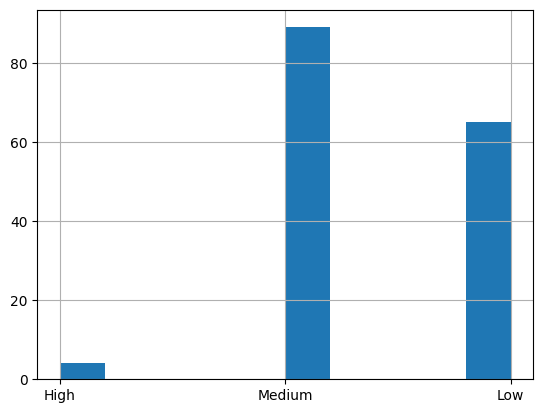

In [473]:
happiness["Happiness Score"].hist()

In [474]:
happiness["Happiness Score"] = ordinal_encoder.fit_transform(happiness[["Happiness Score"]])

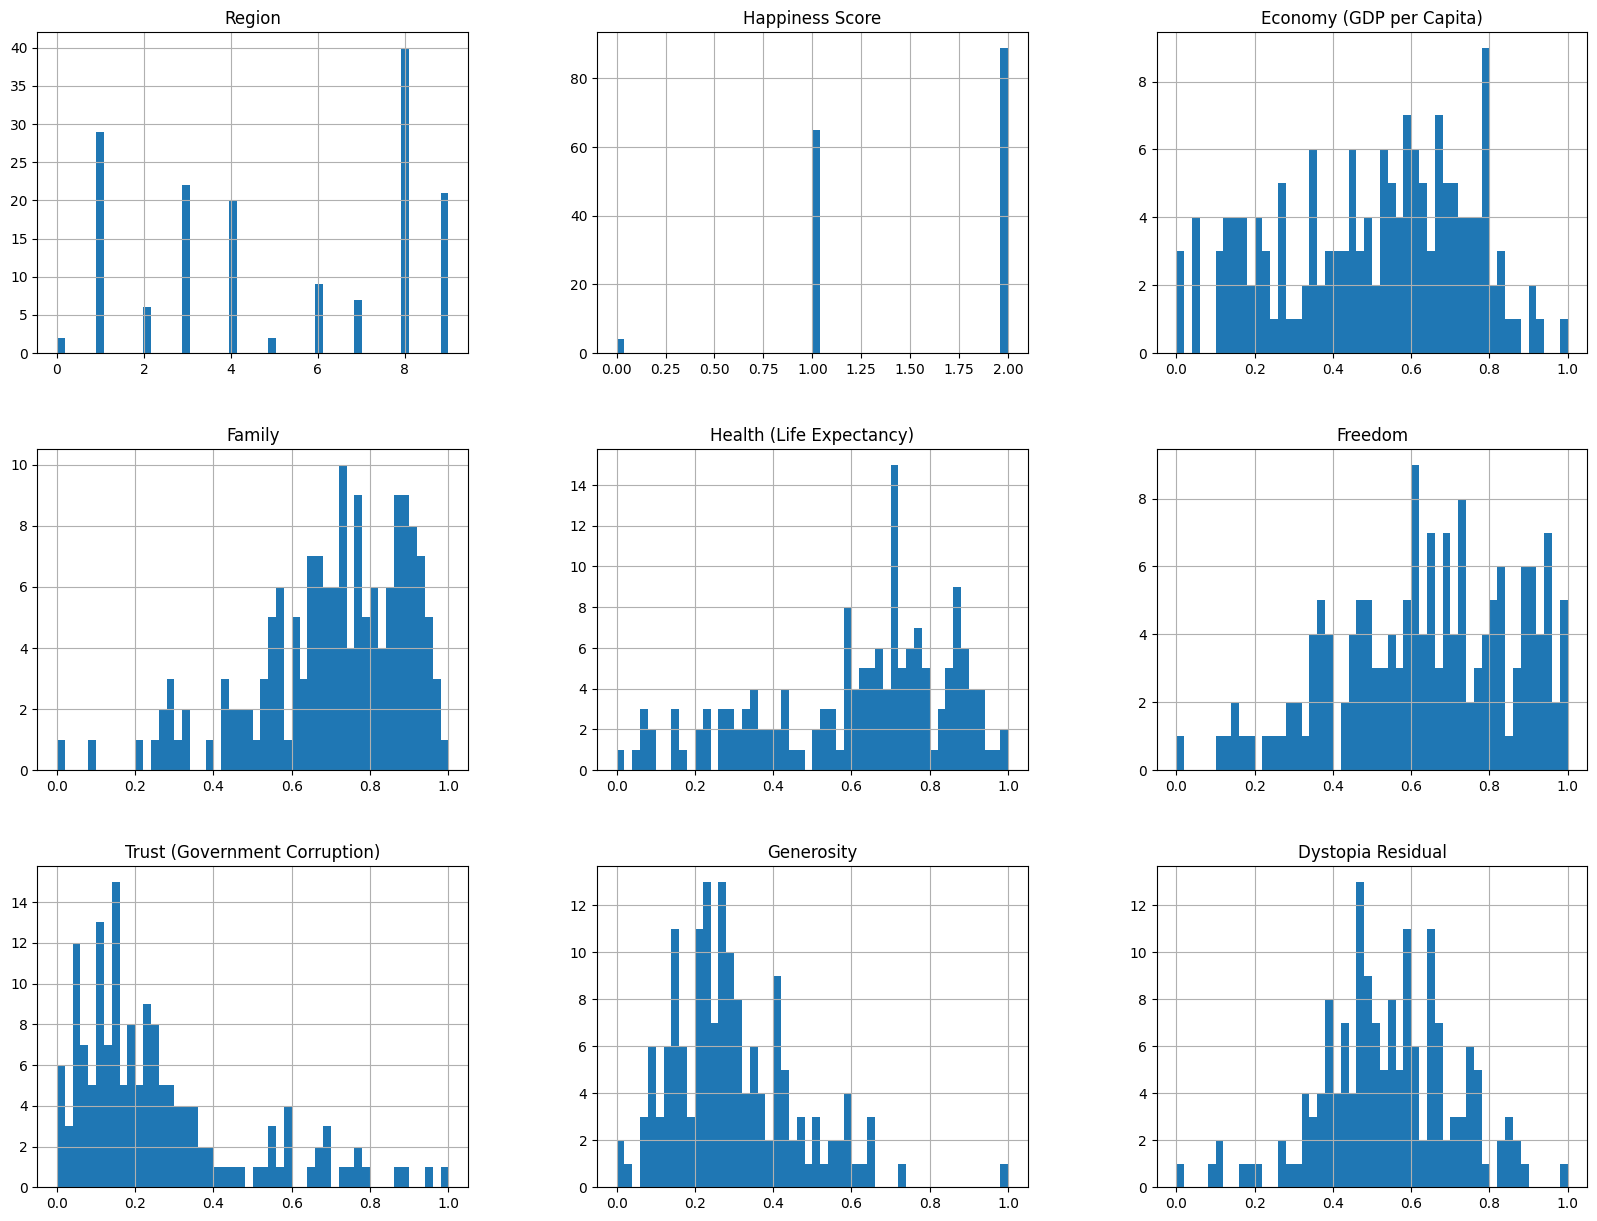

In [475]:
happiness.hist(bins=50, figsize=(20,15))
plt.show()

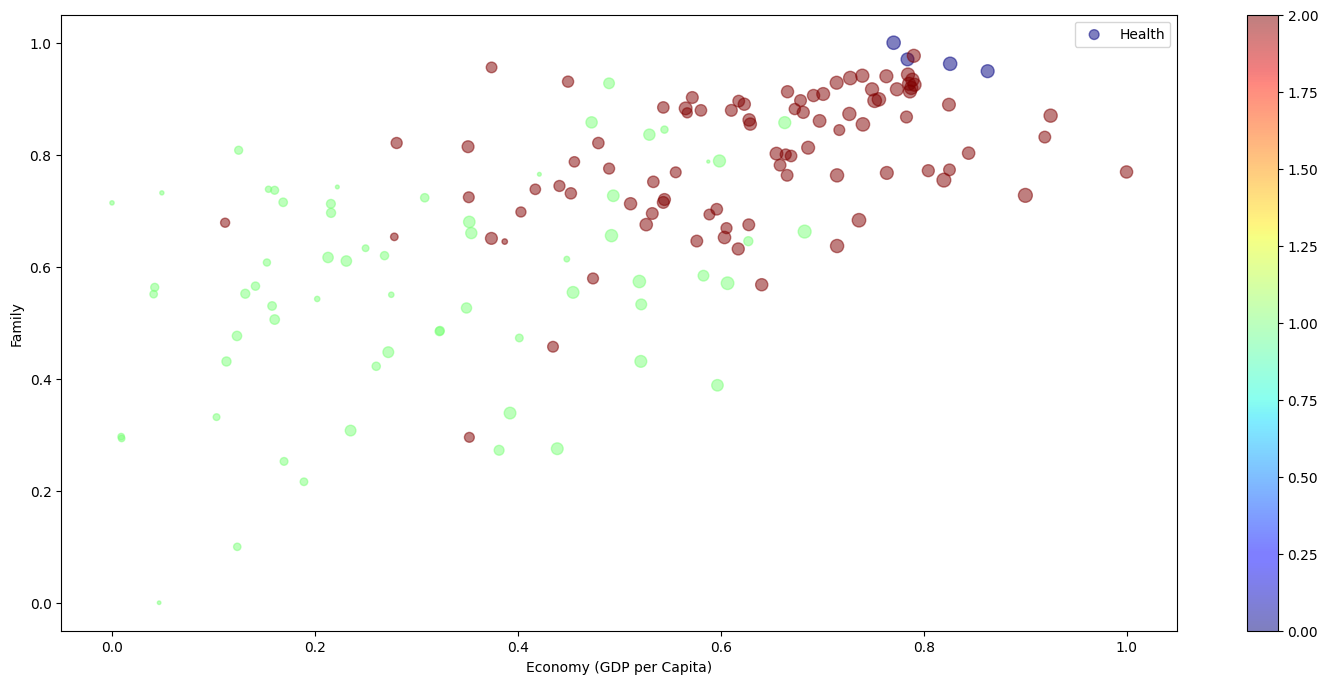

In [476]:
happiness.plot(kind="scatter",x="Economy (GDP per Capita)",y="Family",alpha=0.5,
          s=happiness['Health (Life Expectancy)']*100, label="Health",
          c=happiness["Happiness Score"],figsize=(18,8),cmap=plt.get_cmap("jet"),colorbar=True,
          )
plt.legend()

array([[<Axes: xlabel='Region', ylabel='Region'>,
        <Axes: xlabel='Happiness Score', ylabel='Region'>,
        <Axes: xlabel='Economy (GDP per Capita)', ylabel='Region'>,
        <Axes: xlabel='Family', ylabel='Region'>,
        <Axes: xlabel='Health (Life Expectancy)', ylabel='Region'>,
        <Axes: xlabel='Freedom', ylabel='Region'>,
        <Axes: xlabel='Trust (Government Corruption)', ylabel='Region'>,
        <Axes: xlabel='Generosity', ylabel='Region'>,
        <Axes: xlabel='Dystopia Residual', ylabel='Region'>],
       [<Axes: xlabel='Region', ylabel='Happiness Score'>,
        <Axes: xlabel='Happiness Score', ylabel='Happiness Score'>,
        <Axes: xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>,
        <Axes: xlabel='Family', ylabel='Happiness Score'>,
        <Axes: xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>,
        <Axes: xlabel='Freedom', ylabel='Happiness Score'>,
        <Axes: xlabel='Trust (Government Corruption)', ylabel='Ha

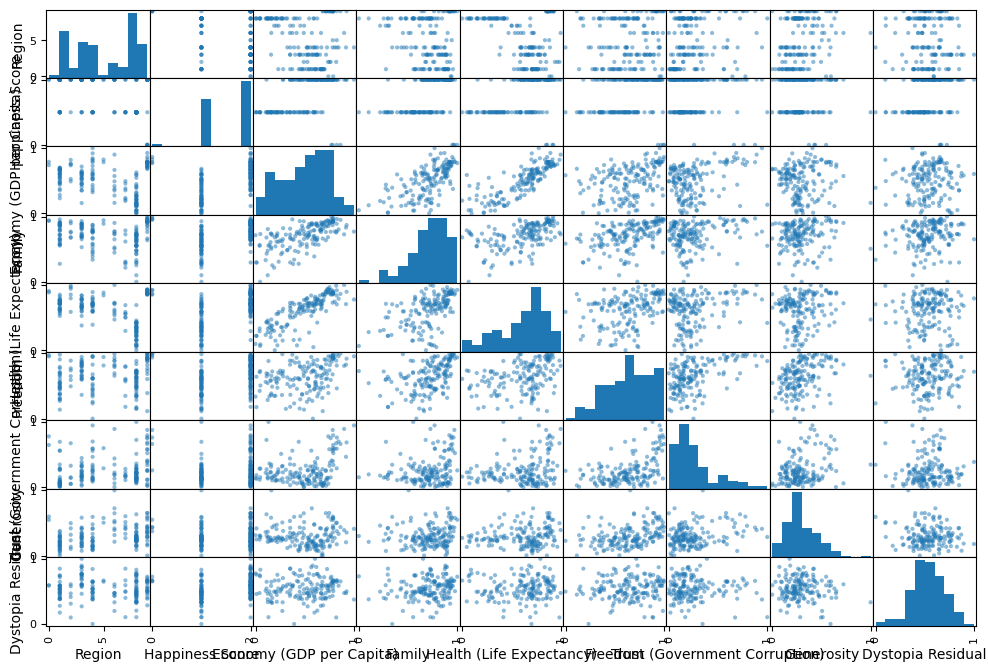

In [477]:
scatter_matrix(happiness, figsize=(12, 8))

In [478]:
attributes = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Dystopia Residual','Generosity','Trust (Government Corruption)']

In [479]:
happiness_corr = happiness[attributes].corr()
happiness_corr['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.493802
Health (Life Expectancy)         0.485514
Family                           0.419039
Freedom                          0.281219
Dystopia Residual                0.275404
Trust (Government Corruption)    0.046072
Generosity                      -0.021890
Name: Happiness Score, dtype: float64

In [486]:
happiness=happiness.drop("Generosity", axis=1)

In [487]:
happiness[:10]

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,9.0,0.0,0.826132,0.962403,0.918244,0.993789,0.760595,0.668630
1,9.0,0.0,0.770412,1.000000,0.924496,0.938841,0.256292,0.725030
2,9.0,0.0,0.784113,0.970297,0.853099,0.969615,0.876175,0.660889
3,9.0,0.0,0.863099,0.949167,0.863409,1.000000,0.661394,0.652724
4,5.0,2.0,0.784592,0.943219,0.883326,0.945112,0.597144,0.648584
5,9.0,2.0,0.763272,0.940117,0.867213,0.958132,0.749615,0.699841
6,9.0,2.0,0.786455,0.912953,0.870851,0.919415,0.576435,0.652843
7,9.0,2.0,0.787798,0.919300,0.888437,0.985173,0.794405,0.623972
8,0.0,2.0,0.739568,0.941122,0.885999,0.954683,0.777699,0.591304
9,0.0,2.0,0.788905,0.933677,0.908617,0.972392,0.645703,0.591979
